# Project1
## Momentum Trading
### MACD

In [1]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import hvplot.pandas


%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

### Collect Investments Data Using Alpaca: `Any` (stocks) 

In [3]:
# Set current amount of shares
my_apple = 1

In [4]:
# Set Alpaca API key and secret
alpaca_api_key=os.getenv('ALPACA_API_KEY')
alpaca_secret_key=os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca=tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)

In [5]:
# Format current date as ISO format
input_start_time=input("Welcome, Please enter start time YYYY-MM-DD:")
input_end_time=input("Please enter end time YYYY-MM-DD:")
start_time=pd.Timestamp(input_start_time, tz='America/New_York').isoformat()
end_time=pd.Timestamp(input_end_time, tz='America/New_York').isoformat()

# Input the ticker
input_ticker=input("Please enter the ticker symbol(AAPL, AMZN, GOOGL, MSFT, TSLA, FB, NFLX, NVDA, BABA, JPM):")
tickers = [input_ticker]


# Set timeframe to "1Minute" for Alpaca API
input_intervals=input("Please enter trading interval(1Min, 5Min, 15Min, 30Min, 1Hour, 1Day, 1Week, 1Month):")
timeframe = input_intervals

# Get current closing prices for AAPL and SP500
df_tickers=alpaca.get_bars(
    tickers,
    timeframe,
    start=start_time,
    end=end_time
).df

df_tickers.head()

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2023-01-03 05:00:00+00:00,125.07,130.9000,124.17,1021067,130.280,124289279,125.700505,AAPL
2023-01-04 05:00:00+00:00,126.36,128.6557,125.08,770045,126.890,95426133,126.634210,AAPL
2023-01-05 05:00:00+00:00,125.02,127.7700,124.76,665463,127.130,88344592,126.016407,AAPL
2023-01-06 05:00:00+00:00,129.62,130.2900,124.89,709888,126.010,96468673,128.305485,AAPL
2023-01-09 05:00:00+00:00,130.15,133.4100,129.89,645367,130.465,76653608,131.519543,AAPL


In [6]:
# Reorganize the DataFrame
# Separate ticker data
df_tickers.drop(['high','low','trade_count','open','volume','vwap','symbol'], axis=1, inplace=True)

df_tickers.head()

,close
timestamp,
2023-01-03 05:00:00+00:00,125.07
2023-01-04 05:00:00+00:00,126.36
2023-01-05 05:00:00+00:00,125.02
2023-01-06 05:00:00+00:00,129.62
2023-01-09 05:00:00+00:00,130.15


### MACD formula

In [7]:
# Set MACD formula and iterate over Apple data for the specified intervals and period of time

moving_average_convergance_divergence_ema12 = df_tickers['close'].ewm(halflife=12).mean()
moving_average_convergance_divergence_ema26 = df_tickers['close'].ewm(halflife=26).mean()
  

In [8]:

MACD_line = moving_average_convergance_divergence_ema12 - moving_average_convergance_divergence_ema26
MACD_line.head()


timestamp
2023-01-03 05:00:00+00:00    0.000000
2023-01-04 05:00:00+00:00    0.010026
2023-01-05 05:00:00+00:00   -0.000901
2023-01-06 05:00:00+00:00    0.048887
2023-01-09 05:00:00+00:00    0.084425
Name: close, dtype: float64

In [9]:
Signal_line = MACD_line.ewm(halflife=9).mean()
Signal_line.head()

timestamp
2023-01-03 05:00:00+00:00    0.000000
2023-01-04 05:00:00+00:00    0.005206
2023-01-05 05:00:00+00:00    0.003012
2023-01-06 05:00:00+00:00    0.015837
2023-01-09 05:00:00+00:00    0.031745
Name: close, dtype: float64

In [10]:
df_tickers=df_tickers.assign(ewm12=df_tickers['close'].ewm(halflife=12).mean())
df_tickers.head()

,close,ewm12
timestamp,,
2023-01-03 05:00:00+00:00,125.07,125.070000
2023-01-04 05:00:00+00:00,126.36,125.733623
2023-01-05 05:00:00+00:00,125.02,125.481884
2023-01-06 05:00:00+00:00,129.62,126.607697
2023-01-09 05:00:00+00:00,130.15,127.400270


In [11]:
df_tickers=df_tickers.assign(ewm26=df_tickers['close'].ewm(halflife=26).mean())
df_tickers.head()

,close,ewm12,ewm26
timestamp,,,
2023-01-03 05:00:00+00:00,125.07,125.070000,125.070000
2023-01-04 05:00:00+00:00,126.36,125.733623,125.723597
2023-01-05 05:00:00+00:00,125.02,125.481884,125.482785
2023-01-06 05:00:00+00:00,129.62,126.607697,126.558810
2023-01-09 05:00:00+00:00,130.15,127.400270,127.315845


In [12]:
df_tickers=df_tickers.assign(macd=MACD_line)
df_tickers.head()

,close,ewm12,ewm26,macd
timestamp,,,,
2023-01-03 05:00:00+00:00,125.07,125.070000,125.070000,0.000000
2023-01-04 05:00:00+00:00,126.36,125.733623,125.723597,0.010026
2023-01-05 05:00:00+00:00,125.02,125.481884,125.482785,-0.000901
2023-01-06 05:00:00+00:00,129.62,126.607697,126.558810,0.048887
2023-01-09 05:00:00+00:00,130.15,127.400270,127.315845,0.084425


In [13]:
df_tickers=df_tickers.assign(signal=Signal_line)
df_tickers.head()

,close,ewm12,ewm26,macd,signal
timestamp,,,,,
2023-01-03 05:00:00+00:00,125.07,125.070000,125.070000,0.000000,0.000000
2023-01-04 05:00:00+00:00,126.36,125.733623,125.723597,0.010026,0.005206
2023-01-05 05:00:00+00:00,125.02,125.481884,125.482785,-0.000901,0.003012
2023-01-06 05:00:00+00:00,129.62,126.607697,126.558810,0.048887,0.015837
2023-01-09 05:00:00+00:00,130.15,127.400270,127.315845,0.084425,0.031745


In [14]:
df_tickers=df_tickers.assign(histogram=MACD_line-Signal_line)
df_tickers.head()

,close,ewm12,ewm26,macd,signal,histogram
timestamp,,,,,,
2023-01-03 05:00:00+00:00,125.07,125.070000,125.070000,0.000000,0.000000,0.000000
2023-01-04 05:00:00+00:00,126.36,125.733623,125.723597,0.010026,0.005206,0.004820
2023-01-05 05:00:00+00:00,125.02,125.481884,125.482785,-0.000901,0.003012,-0.003913
2023-01-06 05:00:00+00:00,129.62,126.607697,126.558810,0.048887,0.015837,0.033050
2023-01-09 05:00:00+00:00,130.15,127.400270,127.315845,0.084425,0.031745,0.052680


In [15]:
Close_plot = df_tickers['close'].hvplot.line(    
    x='timestamp', 
    y='close',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='AAPL close', 
    xlabel='timestamp',
    title='MACD Line & Signal Line',
    grid=True,
).opts(
    yformatter='%.0f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)
Close_plot

/Users/pigeoneyevideography/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/Users/pigeoneyevideography/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/Users/pigeoneyevideography/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:362: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime ob

:Curve   [timestamp]   (close)

In [16]:
MACD_plot = df_tickers['macd'].hvplot.line(    
    x='timestamp', 
    y='macd',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='AAPL close', 
    xlabel='timestamp',
    title='MACD Line & Signal Line',
    grid=True,
).opts(
    yformatter='%.0f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)

In [17]:
Signal_plot = df_tickers['signal'].hvplot.line(    
    x='timestamp', 
    y='signal',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='AAPL close', 
    xlabel='timestamp',
    title='MACD Line & Signal Line',
    grid=True,
    legend=True,
).opts(
    yformatter='%.0f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)

In [18]:
plot = MACD_plot * Signal_plot 
display(Close_plot)
plot

/Users/pigeoneyevideography/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/Users/pigeoneyevideography/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/Users/pigeoneyevideography/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:362: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime ob

:Curve   [timestamp]   (close)

/Users/pigeoneyevideography/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/Users/pigeoneyevideography/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/Users/pigeoneyevideography/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:362: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime ob

:Overlay
   .Curve.Macd   :Curve   [timestamp]   (macd)
   .Curve.Signal :Curve   [timestamp]   (signal)

In [19]:
Histogram_plot = df_tickers['histogram'].hvplot.bar(    
    x='timestamp', 
    y='histogram',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='MACD-Signal', 
    xlabel='timestamp',
    title='MACD Line - Signal Line',
    grid=True,
    legend=True,
).opts(
    yformatter='%.0f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)
Histogram_plot

/Users/pigeoneyevideography/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/Users/pigeoneyevideography/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:362: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  dts = [dt.replace(tzinfo=None) for dt in data.dt.to_pydatetime()]
/Users/pigeoneyevideography/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:362: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return

:Bars   [timestamp]   (histogram)

In [20]:
# itterating over MACD line and Signal Line values of the same date in the final Data Frame above
df_tickers['return']=df_tickers['close'].pct_change()
display(df_tickers)




,close,ewm12,ewm26,macd,signal,histogram,return
timestamp,,,,,,,
2023-01-03 05:00:00+00:00,125.07,125.070000,125.070000,0.000000,0.000000,0.000000,NaN
2023-01-04 05:00:00+00:00,126.36,125.733623,125.723597,0.010026,0.005206,0.004820,0.010314
2023-01-05 05:00:00+00:00,125.02,125.481884,125.482785,-0.000901,0.003012,-0.003913,-0.010605
2023-01-06 05:00:00+00:00,129.62,126.607697,126.558810,0.048887,0.015837,0.033050,0.036794
2023-01-09 05:00:00+00:00,130.15,127.400270,127.315845,0.084425,0.031745,0.052680,0.004089
...,...,...,...,...,...,...,...
2023-11-27 05:00:00+00:00,189.79,182.512455,180.427078,2.085377,0.040981,2.044396,-0.000948
2023-11-28 05:00:00+00:00,190.40,182.955150,180.690042,2.265109,0.205845,2.059264,0.003214
2023-11-29 05:00:00+00:00,189.37,183.315189,180.918898,2.396290,0.368212,2.028078,-0.005410


In [21]:
# Input Fund
input_fund=input("Please input your fund amount:")
fund=input_fund
shares=float(fund)/df_tickers.iloc[0,0]
print(f"Your Apple Shares are {round(shares,2)}")

Your Apple Shares are 79.96


In [22]:
df_tickers["invest"]=df_tickers["close"] * shares
df_tickers.head()

,close,ewm12,ewm26,macd,signal,histogram,return,invest
timestamp,,,,,,,,
2023-01-03 05:00:00+00:00,125.07,125.070000,125.070000,0.000000,0.000000,0.000000,NaN,10000.000000
2023-01-04 05:00:00+00:00,126.36,125.733623,125.723597,0.010026,0.005206,0.004820,0.010314,10103.142240
2023-01-05 05:00:00+00:00,125.02,125.481884,125.482785,-0.000901,0.003012,-0.003913,-0.010605,9996.002239
2023-01-06 05:00:00+00:00,129.62,126.607697,126.558810,0.048887,0.015837,0.033050,0.036794,10363.796274
2023-01-09 05:00:00+00:00,130.15,127.400270,127.315845,0.084425,0.031745,0.052680,0.004089,10406.172543


In [23]:
##Create a new column to indicate the trading signal based on the MACD line and the signal line:

df_tickers['Signal_Crossover'] = np.where(df_tickers['macd'] > df_tickers['signal'], 1, -1)


##Initialize variables to track the trading positions and the returns:

position = 0 # 1 for long, -1 for short, 0 for no position
long=0
buy = []
sell =[]


##Implement the trading strategy by iterating over the rows and making trading decisions based on the signal crossover:

for i in range(1, len(df_tickers)):
    if df_tickers['Signal_Crossover'][i] > df_tickers['Signal_Crossover'][i-1] and df_tickers['Signal_Crossover'][i-1]<= df_tickers['Signal_Crossover'][i]:
        if position != 1:
            position = 1 # Go long
            buy.append(df_tickers['invest'][i])
        else:
            buy.append(0)
    elif df_tickers['Signal_Crossover'][i] < df_tickers['Signal_Crossover'][i-1] and df_tickers['Signal_Crossover'][i-1]>= df_tickers['Signal_Crossover'][i]:
        if position != -1:
            position = -1 # Go short
            sell.append(df_tickers['invest'][i])
        else:
            sell.append(0)
    else:
        [buy,sell].append(0)

###for i in range(1, len(df_tickers)):
#    if df_tickers['Signal_Crossover'][i] > df_tickers['Signal_Crossover'][i-1] and df_tickers['Signal_Crossover'][i-1]<= df_tickers['Signal_Crossover'][i]:
#        if position != 1:
#            position = 1 # Go long
#            buy_long.append(df_tickers['invest'][i] - df_tickers['invest'][i-1])
#        else:
#            buy_long.append(0)
#    elif df_tickers['Signal_Crossover'][i] < df_tickers['Signal_Crossover'][i-1] and df_tickers['Signal_Crossover'][i-1]>= df_tickers['Signal_Crossover'][i]:
 #       if position != -1:
 #           position = -1 # Go short
 #           sell_short.append(df_tickers['invest'][i-1] - df_tickers['invest'][i])
 #       else:
 #           sell_short.append(0)
 #   else:
 #       [buy_long,sell_short].append(0)
##Calculate the cumulative returns and plot them:

print("Buy:", buy)
print("Sell:", sell)



Buy: [10103.142240345407, 10363.796274086513, 12299.512273127051, 12200.367794035341, 14623.011113776285]
Sell: [9996.002238746301, 11666.266890541297, 12030.862716878548, 15285.040377388663]


/var/folders/k0/94snjnyj0_qb2hdn44hh2tlm0000gn/T/ipykernel_59925/846347841.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df_tickers['Signal_Crossover'][i] > df_tickers['Signal_Crossover'][i-1] and df_tickers['Signal_Crossover'][i-1]<= df_tickers['Signal_Crossover'][i]:
/var/folders/k0/94snjnyj0_qb2hdn44hh2tlm0000gn/T/ipykernel_59925/846347841.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  buy.append(df_tickers['invest'][i])
/var/folders/k0/94snjnyj0_qb2hdn44hh2tlm0000gn/T/ipykernel_59925/846347841.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, i

In [24]:
buy_sum = sum(buy)
sell_sum = sum(sell)
long= sell_sum - buy_sum
print(long)

-10611.657471815794


In [25]:
display(df_tickers)

,close,ewm12,ewm26,macd,signal,histogram,return,invest,Signal_Crossover
timestamp,,,,,,,,,
2023-01-03 05:00:00+00:00,125.07,125.070000,125.070000,0.000000,0.000000,0.000000,NaN,10000.000000,-1
2023-01-04 05:00:00+00:00,126.36,125.733623,125.723597,0.010026,0.005206,0.004820,0.010314,10103.142240,1
2023-01-05 05:00:00+00:00,125.02,125.481884,125.482785,-0.000901,0.003012,-0.003913,-0.010605,9996.002239,-1
2023-01-06 05:00:00+00:00,129.62,126.607697,126.558810,0.048887,0.015837,0.033050,0.036794,10363.796274,1
2023-01-09 05:00:00+00:00,130.15,127.400270,127.315845,0.084425,0.031745,0.052680,0.004089,10406.172543,1
...,...,...,...,...,...,...,...,...,...
2023-11-27 05:00:00+00:00,189.79,182.512455,180.427078,2.085377,0.040981,2.044396,-0.000948,15174.702167,1
2023-11-28 05:00:00+00:00,190.40,182.955150,180.690042,2.265109,0.205845,2.059264,0.003214,15223.474854,1
2023-11-29 05:00:00+00:00,189.37,183.315189,180.918898,2.396290,0.368212,2.028078,-0.005410,15141.120972,1


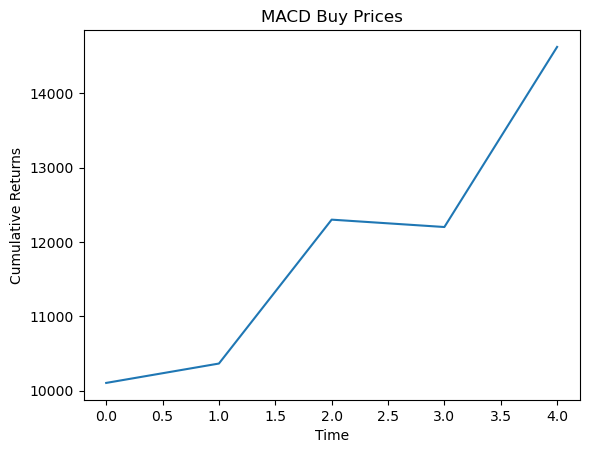

In [26]:
plt.plot(buy)
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.title('MACD Buy Prices')
plt.show()

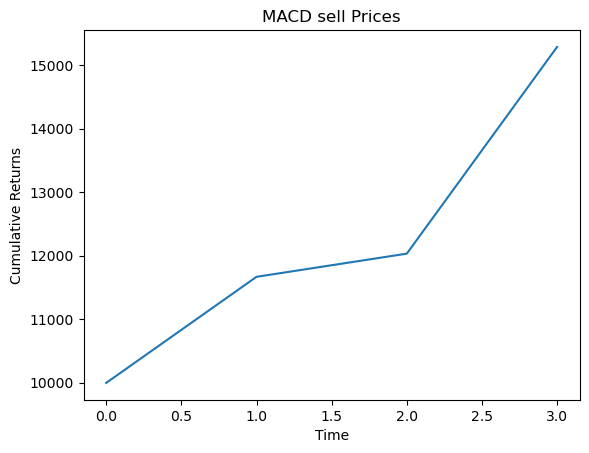

In [27]:
plt.plot(sell)
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.title('MACD sell Prices')
plt.show()

In [28]:
# Format current date as ISO format
start_time=pd.Timestamp(input_start_time, tz='America/New_York').isoformat()
end_time=pd.Timestamp(input_end_time, tz='America/New_York').isoformat()

# Set the tickers
tickers = ["SPY"]

# Set timeframe to "1Minute" for Alpaca API
timeframe = input_intervals

# Get current closing prices for AAPL and SP500
df_spy=alpaca.get_bars(
    tickers,
    timeframe,
    start=start_time,
    end=end_time
).df

df_spy.head()

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2023-01-03 05:00:00+00:00,380.82,386.43,377.8310,590240,384.37,74850731,380.957589,SPY
2023-01-04 05:00:00+00:00,383.76,385.88,380.0000,632808,383.18,85934098,383.149365,SPY
2023-01-05 05:00:00+00:00,379.38,381.84,378.7600,530899,381.72,76970456,380.269250,SPY
2023-01-06 05:00:00+00:00,388.08,389.25,379.4127,685781,382.61,104026233,385.245977,SPY
2023-01-09 05:00:00+00:00,387.86,393.70,387.6700,549428,390.37,73978071,390.362771,SPY


In [29]:
# Reorganize the DataFrame
# Separate ticker data
df_spy.drop(['high','low','trade_count','open','volume','vwap','symbol'], axis=1, inplace=True)

df_spy.head()

,close
timestamp,
2023-01-03 05:00:00+00:00,380.82
2023-01-04 05:00:00+00:00,383.76
2023-01-05 05:00:00+00:00,379.38
2023-01-06 05:00:00+00:00,388.08
2023-01-09 05:00:00+00:00,387.86


In [30]:
# Returns 
df_spy['return']=df_spy['close'].pct_change()
df_spy.head()


,close,return
timestamp,,
2023-01-03 05:00:00+00:00,380.82,NaN
2023-01-04 05:00:00+00:00,383.76,0.007720
2023-01-05 05:00:00+00:00,379.38,-0.011413
2023-01-06 05:00:00+00:00,388.08,0.022932
2023-01-09 05:00:00+00:00,387.86,-0.000567


In [31]:
# Cumulative returns
df_spy['cumprod']=(1+df_spy['return']).cumprod()
display(df_spy.head)

<bound method NDFrame.head of                             close    return   cumprod
timestamp                                            
2023-01-03 05:00:00+00:00  380.82       NaN       NaN
2023-01-04 05:00:00+00:00  383.76  0.007720  1.007720
2023-01-05 05:00:00+00:00  379.38 -0.011413  0.996219
2023-01-06 05:00:00+00:00  388.08  0.022932  1.019064
2023-01-09 05:00:00+00:00  387.86 -0.000567  1.018486
...                           ...       ...       ...
2023-11-27 05:00:00+00:00  454.48 -0.001801  1.193425
2023-11-28 05:00:00+00:00  454.93  0.000990  1.194606
2023-11-29 05:00:00+00:00  454.61 -0.000703  1.193766
2023-11-30 05:00:00+00:00  456.40  0.003937  1.198466
2023-12-01 05:00:00+00:00  459.10  0.005916  1.205556

[231 rows x 3 columns]>

In [32]:

df_spy['invest']=df_spy['cumprod']*float(fund)
display(df_spy)

,close,return,cumprod,invest
timestamp,,,,
2023-01-03 05:00:00+00:00,380.82,NaN,NaN,NaN
2023-01-04 05:00:00+00:00,383.76,0.007720,1.007720,10077.201828
2023-01-05 05:00:00+00:00,379.38,-0.011413,0.996219,9962.186860
2023-01-06 05:00:00+00:00,388.08,0.022932,1.019064,10190.641248
2023-01-09 05:00:00+00:00,387.86,-0.000567,1.018486,10184.864240
...,...,...,...,...
2023-11-27 05:00:00+00:00,454.48,-0.001801,1.193425,11934.247151
2023-11-28 05:00:00+00:00,454.93,0.000990,1.194606,11946.063757
2023-11-29 05:00:00+00:00,454.61,-0.000703,1.193766,11937.660837


In [33]:
spy_plot = df_spy['invest'].hvplot.line(    
    x='timestamp', 
    y='invest',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='Cumulative Returns', 
    xlabel='timestamp',
    title='SPY Cumulative returns',
    grid=True,
).opts(
    yformatter='%.0f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)

spy_plot

/Users/pigeoneyevideography/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/Users/pigeoneyevideography/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/Users/pigeoneyevideography/anaconda3/lib/python3.11/site-packages/holoviews/core/data/pandas.py:362: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime ob

:Curve   [timestamp]   (invest)

In [34]:
spy_return=df_spy.iloc[-1,-1] - df_spy.iloc[1,-1]
print(f"You made a profit of your SPY investement of $ {round(spy_return,2)}")

You made a profit of your SPY investement of $ 1978.36


In [35]:
final_df=pd.DataFrame({"MACD / Long": [long], "SPY":[spy_return]})
final_df.head()

,MACD / Long,SPY
0,-10611.657472,1978.362481


<Axes: title={'center': 'MACD long vs SPY Investement'}>

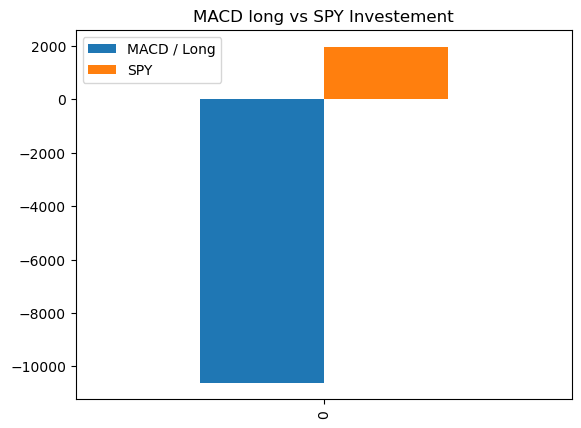

In [36]:

final_df.plot(kind ='bar', title='MACD long vs SPY Investement')